<a href="https://colab.research.google.com/github/AbinSibi466/NNDL/blob/main/Abin_202_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab Assignment: Implementing CNN on the Fashion-MNIST Dataset**

**Objective:** In this lab, you will implement a Convolutional Neural Network (CNN) using
the Intel Image Classification dataset. Your task is to train a CNN model to classify
these images with high accuracy. (Link:-
https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
This dataset contains the images of Natural Scenes around the world with 25k images
of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5}
The Train, Test and Prediction data is separated in each zip files. There are around 14k
images in Train, 3k in Test and 7k in Prediction.

**Tasks:**

**1. Dataset Overview:**

o Visualize a few samples from the dataset, displaying their corresponding
labels.

**2. Model Architecture:**

o Design a CNN model with at least 3 convolutional layers, followed by
pooling layers and fully connected (dense) layers.

o Experiment with different kernel sizes, activation functions (such as
ReLU), and pooling strategies (max-pooling or average pooling).

o Implement batch normalization and dropout techniques to improve the
generalization of your model.

**3. Model Training:**

o Split the dataset into training and test sets.

o Compile the model using an appropriate loss function (categorical cross-
entropy) and an optimizer (such as Adam or SGD).

o Train the model for a sufficient number of epochs, monitoring the training
and validation accuracy.

**4. Evaluation:**

o Evaluate the trained model on the test set and report the accuracy.

o Plot the training and validation accuracy/loss curves to visualize the
model's performance.

o Display the confusion matrix for the test set to analyze misclassified
samples.

**5. Optimization :**

o Experiment with data augmentation techniques (rotation, flipping,
zooming) to further improve the model’s performance.

o Fine-tune hyperparameters like learning rate, batch size, and the number
of filters in each layer.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from tqdm import tqdm

100%|██████████| 346M/346M [00:05<00:00, 65.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2
Loading /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train


100%|██████████| 2512/2512 [00:01<00:00, 2140.89it/s]


Loading /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 2887.78it/s]


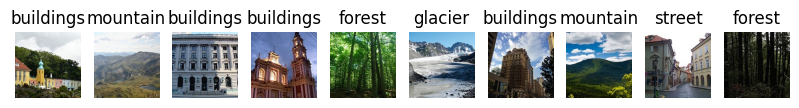

In [2]:
import kagglehub
import numpy as np
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Download the dataset using kagglehub and get the path
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

# Class names and labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)

def load_data(dataset_path):
    """
    Load the data:
        - 14,034 images to train the network.
        - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = [os.path.join(dataset_path, 'seg_train/seg_train'),
                os.path.join(dataset_path, 'seg_test/seg_test')]

    output = []

    # Iterate through training and test sets
    for dataset in datasets:
        images = []
        labels = []

        print(f"Loading {dataset}")

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(dataset, folder, file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

# Load the dataset using the path from kagglehub
dataset_path = path

(x_train, y_train), (x_test, y_test) = load_data(dataset_path)

# Number of samples to visualize
num_samples = 10

# Randomly select samples
random_indices = random.sample(range(len(x_train)), num_samples)

# Plot the images and their labels
plt.figure(figsize=(10, 8))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[index].astype('uint8'))  # Ensure correct data type for display
    plt.title(class_names[y_train[index]])
    plt.axis('off')

plt.show()


In [3]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(6, activation='softmax'))  # 6 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
 79/351 ━━━━━━━━━━━━━━━━━━━━ 10:52 2s/step - accuracy: 0.3755 - loss: 6.8671

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(6, activation='softmax'))  # 6 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

NameError: name 'x_train' is not defined